# Flanker task timing test plots

## Load Test 1 data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# MindLogger exported Flanker csv table with test data:
base_dir = '/Users/arno/Software/mindlogger-time-tests/'
csv_file = base_dir + 'input/flanker_test_20220405/624789f25197b9338bdb113c_test1.csv'
columns = ['block_number','trial_number','trial_type','event_type','experiment_start_timestamp',
           'block_start_timestamp','trial_start_timestamp','event_start_timestamp',
           'video_display_request_timestamp','response_touch_timestamp','trial_offset','event_offset',
           'response_time','response','response_accuracy']
df = pd.read_csv(csv_file, usecols=columns)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Movie of the Flanker task test 1 block of trials:
# Convert movie and add frame numbers:
## ffmpeg -i /Users/arno.klein/Downloads/flanker_test_20220405.MOV -vf "drawtext=fontfile=Arial.ttf: text='%{frame_num}': fontsize=200: start_number=1: x=(w-tw)/2: y=h-(2*lh): fontcolor=black: fontsize=20: box=1: boxcolor=white: boxborderw=5" -c:a copy /Users/arno/Downloads/flanker_test_frames.mp4fps = 240.
fps = 240
ms_per_frame = 1000/240

# Excel table with test data frame numbers:
csv_file2 = base_dir + 'input/flanker_test_20220405/624789f25197b9338bdb113c_test1_frames.csv'
df2 = pd.read_csv(csv_file2, usecols=['frame'])
frames = df2.frame
frame_times = np.array([x * 1000 / fps for x in frames])
imax = len(frames)

## Touch to fixation

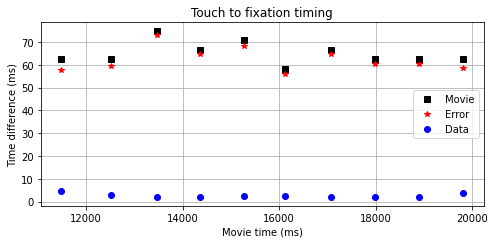

Touch to fixation time:
Movie mean (SD): 65.00 (4.64) +- 8.33 ms (2 frames)
Data mean (SD): 2.11 (1.09) ms
Error (movie - data) mean (SD): 62.46 (5.02)


In [2]:
touch_to_fixation_movie = pd.Series(np.zeros(len(frames)))
fixation_to_stimulus_movie = pd.Series(np.zeros(len(frames)))
i = 0
for frame in frames:
    i = i + 1
    if i > 1:
        if i % 3 == 1:
            touch_to_fixation_movie[i-1] = (frame - frames[i-2]) * 1000 / fps
        else:
            touch_to_fixation_movie[i-1] = np.nan
        if i % 3 == 2:
            fixation_to_stimulus_movie[i-1] = (frame - frames[i-2]) * 1000 / fps
        else:
            fixation_to_stimulus_movie[i-1] = np.nan
            
touch_to_fixation = pd.Series(np.zeros(len(frames)))
i = 0
for frame in frames:
    i = i + 1
    if i > 1:
        if i % 3 == 1:
            touch_to_fixation[i-1] = float(df.event_start_timestamp[i-1]) - float(df.response_touch_timestamp[i-2])
        else:
            touch_to_fixation[i-1] = np.nan

touch_to_fixation_error = touch_to_fixation_movie - touch_to_fixation

imin = 1

plt.plot(frame_times[imin:imax], touch_to_fixation_movie[imin:imax], marker='s', linestyle='', color='k', label='Movie')
plt.plot(frame_times[imin:imax], touch_to_fixation_error[imin:imax], marker='*', linestyle='', color='r', label='Error')
plt.plot(frame_times[imin:imax], touch_to_fixation[imin:imax], marker='o', linestyle='', color='b', label='Data')
plt.title('Touch to fixation timing')
plt.xlabel ('Movie time (ms)')
plt.ylabel ('Time difference (ms)')
plt.legend()
plt.grid()
plt.show()

print("Touch to fixation time:")
print("Movie mean (SD): {0:.2f} ({1:.2f}) +- {2:.2f} ms (2 frames)".format(np.mean(touch_to_fixation_movie[imin:imax]),
                                                                           np.std(touch_to_fixation_movie[imin:imax]),
                                                                           2 * ms_per_frame))
print("Data mean (SD): {0:.2f} ({1:.2f}) ms".format(np.mean(touch_to_fixation[imin:imax]), 
                                                           np.std(touch_to_fixation[imin:imax])))
print("Error (movie - data) mean (SD): {0:.2f} ({1:.2f})".format(np.mean(touch_to_fixation_error[imin:imax]), 
                                                                   np.std(touch_to_fixation_error[imin:imax])))



## Fixation to stimulus

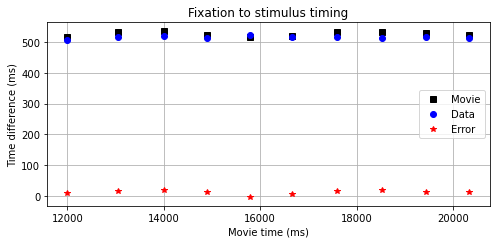

Fixation to stimulus time:
Movie mean (SD): 527.08 (7.03) +- 8.33 ms (2 frames)
Data mean (SD): 514.75 (2.91) ms
Error (movie - data) mean (SD): 11.58 (7.04)


In [3]:
fixation_to_stimulus = pd.Series(np.zeros(len(frames)))

i = 0
for frame in frames:
    i = i + 1
    if i > 1:
        if i % 3 == 2:
            fixation_to_stimulus[i-1] = float(df.event_start_timestamp[i-1]) - float(df.trial_start_timestamp[i-2])
        else:
            fixation_to_stimulus[i-1] = np.nan

fixation_to_stimulus_error = fixation_to_stimulus_movie - fixation_to_stimulus

imin = 2

plt.plot(frame_times[imin:imax], fixation_to_stimulus_movie[imin:imax], marker='s', linestyle='', color='k', label='Movie')
plt.plot(frame_times[imin:imax], fixation_to_stimulus[imin:imax], marker='o', linestyle='', color='b', label='Data')
plt.plot(frame_times[imin:imax], fixation_to_stimulus_error[imin:imax], marker='*', linestyle='', color='r', label='Error')
plt.title('Fixation to stimulus timing')
plt.xlabel ('Movie time (ms)')
plt.ylabel ('Time difference (ms)')
plt.legend()
plt.grid()
plt.show()

print("Fixation to stimulus time:")
print("Movie mean (SD): {0:.2f} ({1:.2f}) +- {2:.2f} ms (2 frames)".format(np.mean(fixation_to_stimulus_movie[imin:imax]),
                                                                           np.std(fixation_to_stimulus_movie[imin:imax]),
                                                                           2 * ms_per_frame))
print("Data mean (SD): {0:.2f} ({1:.2f}) ms".format(np.mean(fixation_to_stimulus[imin:imax]), 
                                                           np.std(fixation_to_stimulus[imin:imax])))
print("Error (movie - data) mean (SD): {0:.2f} ({1:.2f})".format(np.mean(fixation_to_stimulus_error[imin:imax]), 
                                                                   np.std(fixation_to_stimulus_error[imin:imax])))

